# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Steven Lukas Samosir
- **Email:** mc114d5y1917@student.devacademy.id
- **Email terdaftar:** stevenlukas990@gmail.com
- **ID Dicoding:** MC114D5Y1917

## Menentukan Pertanyaan Bisnis

-  Apa perbedaan dampak cuaca terhadap jumlah penyewaan sepeda di hari kerja dan akhir pekan selama setahun terakhir?

- Kapan waktu puncak penyewaan sepeda terjadi pada hari kerja dan akhir pekan, serta bagaimana variasi pola tersebut di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

## Data Wrangling

### Gathering Data

In [4]:
# Memuat data dari file day.csv yang ada di folder sample_data
day_df = pd.read_csv('data/day.csv')

# Memuat data dari file hour.csv yang ada di folder sample_data
hour_df = pd.read_csv('data/hour.csv')

**Insight:**
- day.csv menyimpan informasi tentang penyewaan sepeda yang dicatat setiap hari.
- hour.csv menyimpan informasi tentang penyewaan sepeda yang dicatat setiap jam.

### Assessing Data

In [5]:
# Menampilkan beberapa baris pertama dari data day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Menampilkan informasi umum tentang struktur data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Menampilkan statistik deskriptif dari data day_df
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# Menampilkan beberapa baris pertama dari data hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Menampilkan informasi umum tentang struktur data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
# Menampilkan statistik deskriptif dari data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# Mengecek jumlah nilai yang hilang di setiap kolom
day_df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Mengecek persentase nilai yang hilang di setiap kolom
day_df.isnull().mean() * 100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [13]:
# Missing Values
print("\nMissing Values:")
print(day_df.isnull().sum())
print(hour_df.isnull().sum())


Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
# Mengecek jumlah baris duplikat
day_df.duplicated().sum()


np.int64(0)

**Insight:**
- Beberapa kolom masih perlu penyesuaian tipe data, contohnya kolom dteday yang seharusnya dikonversi ke format datetime.

- Dataset ini bersih dari nilai kosong atau data yang hilang.

- Karena tidak ditemukan data duplikat, setiap entri bersifat unik. Hal ini menguntungkan dalam proses analisis karena tidak ada risiko bias dari data yang terulang, sehingga hasil analisis maupun model yang dibangun menjadi lebih akurat.-

### Cleaning Data

In [15]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Tipe data kolom 'dteday' telah diubah menjadi datetime.


## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
# Ringkasan Data Harian
print("Ringkasan Data Harian:")
print(day_df.info())


Ringkasan Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: 

In [17]:
# Ringkasan Data Per Jam
print("\nRingkasan Data Per Jam:")
print(hour_df.info())


Ringkasan Data Per Jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 1

In [18]:
# Statistik Deskriptif
print("\nStatistik Deskriptif Data Harian:")
print(day_df.describe())
print("\nStatistik Deskriptif Data Per Jam:")
print(hour_df.describe())


Statistik Deskriptif Data Harian:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000  

<Figure size 1200x600 with 0 Axes>

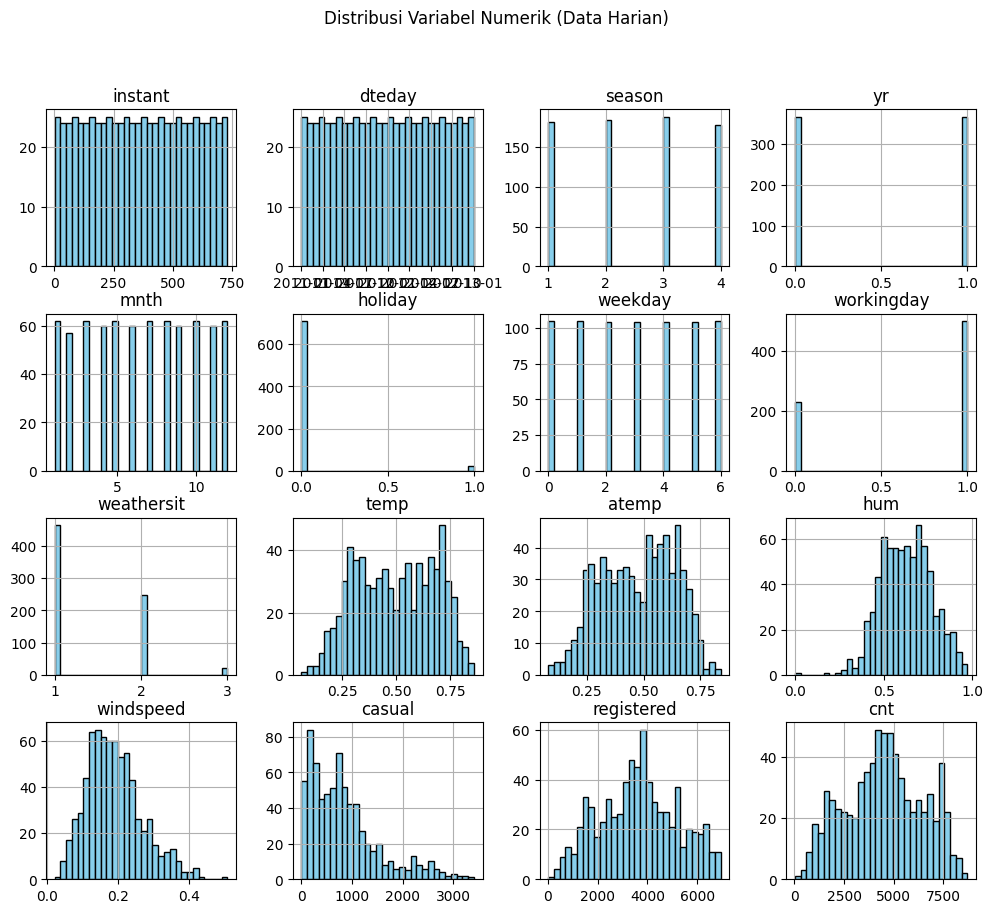

In [19]:
# Distribusi Variabel Numerik
plt.figure(figsize=(12, 6))
day_df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik (Data Harian)')
plt.show()

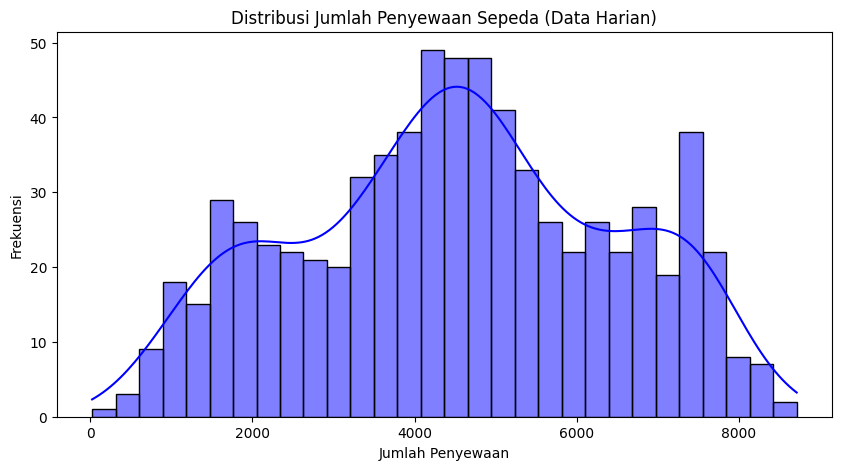

In [20]:
# Distribusi Penyewaan Sepeda (cnt)
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Penyewaan Sepeda (Data Harian)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\3083426954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')


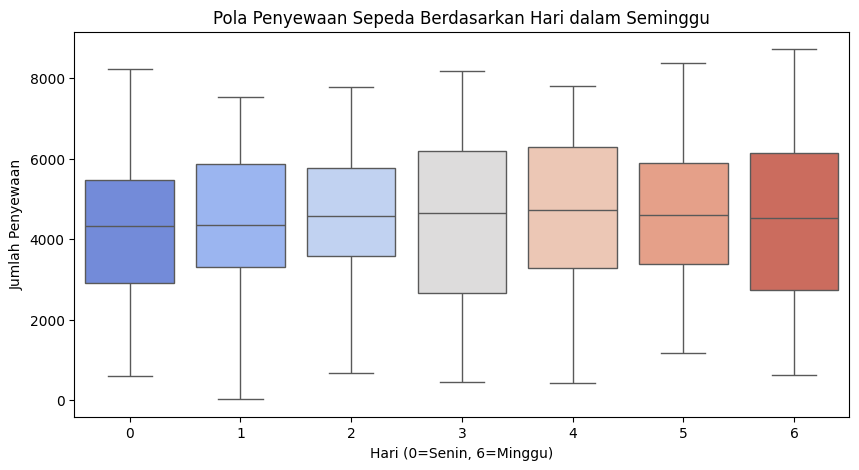

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\3083426954.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hr', y='cnt', data=hour_df, palette='viridis')


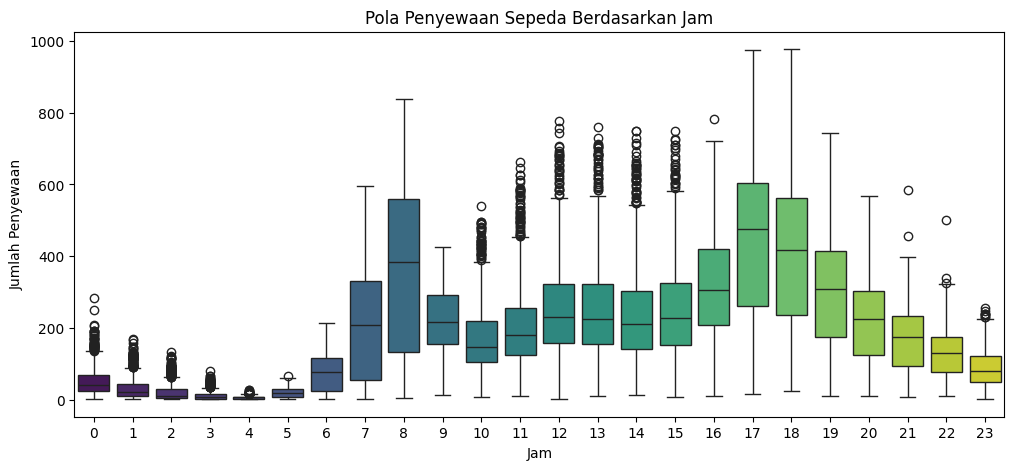

In [21]:
# Pola Penyewaan Sepeda Berdasarkan Waktu
plt.figure(figsize=(10, 5))
sns.boxplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')
plt.title('Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='hr', y='cnt', data=hour_df, palette='viridis')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\3358179321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')


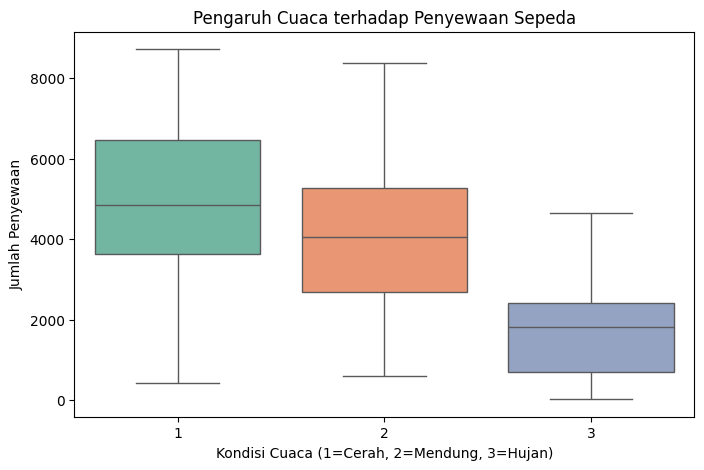

In [22]:
# Pengaruh Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Data dalam dataset bersih tanpa nilai yang hilang, sehingga tidak diperlukan proses imputasi atau pembersihan tambahan.

- Variabel suhu (temp) menunjukkan korelasi positif dengan total penyewaan sepeda (cnt), yang berarti semakin tinggi suhu, semakin banyak sepeda yang digunakan.

- Kelembaban udara (hum) dan kecepatan angin (windspeed) berkorelasi negatif dengan jumlah penyewaan, mengindikasikan bahwa kondisi cuaca yang ekstrem dapat mengurangi minat pengguna.

- Penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan akhir pekan, menandakan bahwa layanan ini lebih sering dimanfaatkan oleh kalangan pekerja atau pelajar untuk keperluan mobilitas rutin.

- Waktu puncak penyewaan di hari kerja terjadi pada pukul 07:00–09:00 dan 17:00–19:00, yang sesuai dengan jam keberangkatan dan kepulangan kerja atau sekolah.

- Di akhir pekan, pola penyewaan lebih menyebar sepanjang hari, dengan peningkatan jumlah penyewaan pada siang hingga sore hari.

- Kondisi cuaca cerah (weathersit = 1) menghasilkan angka penyewaan tertinggi.

- Saat cuaca mendung (weathersit = 2), jumlah penyewaan menurun sedikit namun tetap tergolong tinggi.

- Dalam kondisi hujan atau badai (weathersit ≥ 3), jumlah penyewaan turun secara signifikan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apa perbedaan dampak cuaca terhadap jumlah penyewaan sepeda di hari kerja dan akhir pekan selama setahun terakhir?

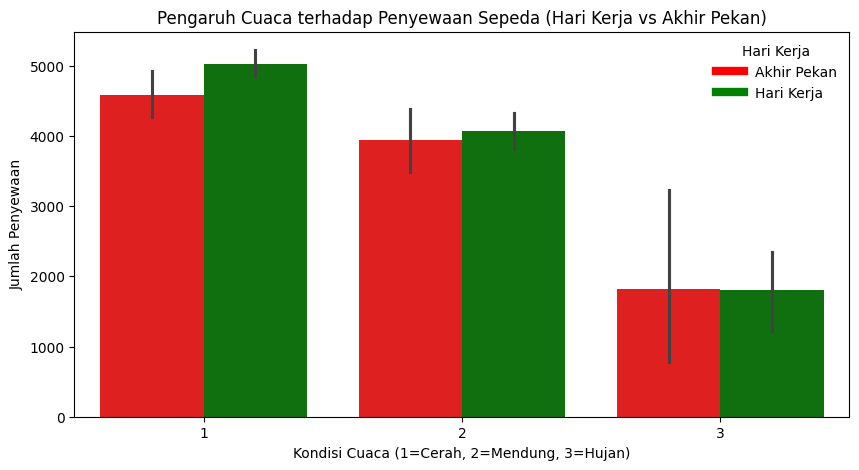

In [23]:
plt.figure(figsize=(10, 5))

# Menentukan warna hijau untuk hari kerja dan merah untuk akhir pekan)
sns.barplot(x='weathersit', y='cnt', hue='workingday', data=day_df, palette={0: 'red', 1: 'green'})

plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda (Hari Kerja vs Akhir Pekan)')
plt.xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan)')
plt.ylabel('Jumlah Penyewaan')

# Menambahkan garis ke dalam legenda untuk 'Hari Kerja' dan 'Akhir Pekan'
legend_akhir_pekan = mlines.Line2D([], [], color='red', label='Akhir Pekan', linewidth=6)
legend_hari_kerja = mlines.Line2D([], [], color='green', label='Hari Kerja', linewidth=6)

# Menambahkan legenda dengan garis
plt.legend(handles=[legend_akhir_pekan, legend_hari_kerja], title='Hari Kerja', loc='upper right', frameon=False)

plt.show()


### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda terjadi pada hari kerja dan akhir pekan, serta bagaimana variasi pola tersebut di setiap musim?

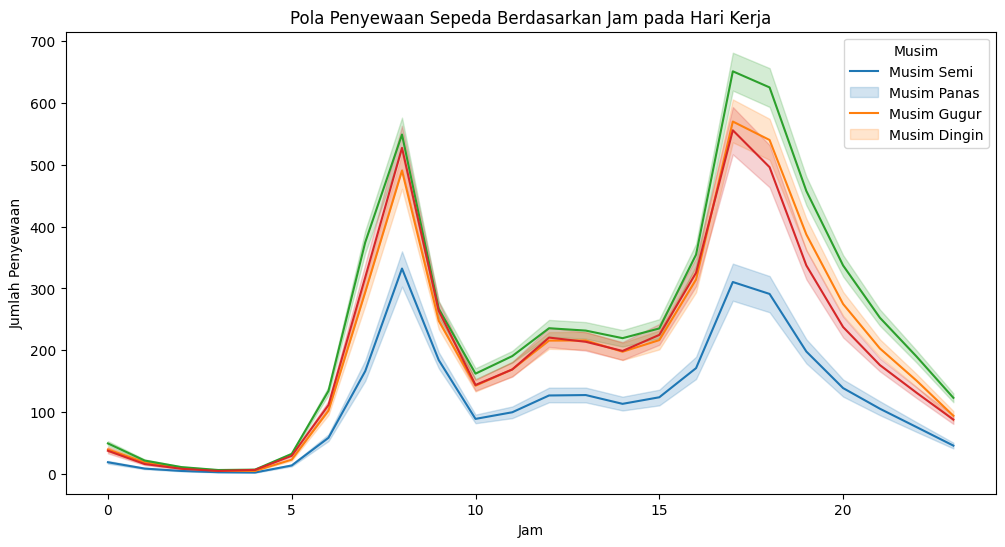

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=hour_df[hour_df['workingday'] == 1], palette='tab10')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam pada Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Musim', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

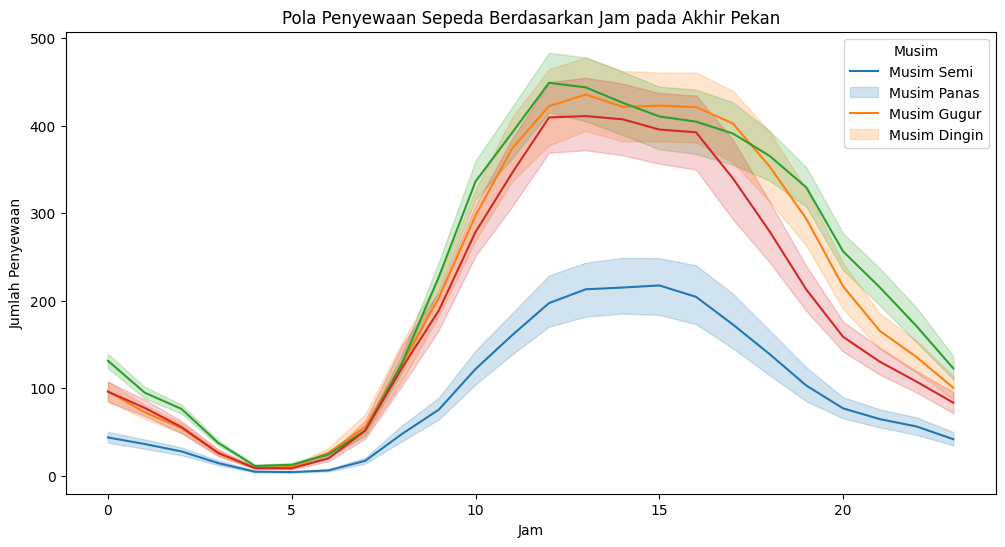

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='season', data=hour_df[hour_df['workingday'] == 0], palette='tab10')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam pada Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Musim', labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

**Insight:**
- Aktivitas penyewaan sepeda cenderung meningkat saat cuaca cerah, baik pada hari kerja maupun akhir pekan.

- Di hari kerja, penyewaan tetap relatif stabil meskipun cuaca mendung, sedangkan pada akhir pekan fluktuasinya lebih terlihat.

- Cuaca hujan menyebabkan penurunan tajam dalam jumlah penyewaan, menandakan bahwa pengguna lebih memilih tidak menggunakan sepeda dalam kondisi cuaca buruk.

- Pola penyewaan menunjukkan bahwa faktor cuaca memainkan peran penting dalam menentukan intensitas penggunaan sepeda.

- Di hari kerja, terdapat dua waktu puncak penyewaan yakni pada pukul 07:00–09:00 dan 17:00–19:00, yang bertepatan dengan jam sibuk.

- Di akhir pekan, penyewaan sepeda cenderung tersebar lebih merata sepanjang hari, dengan peningkatan kecil di siang hingga sore hari.

- Jumlah penyewaan tertinggi tercatat pada musim panas dan musim gugur, sementara musim semi dan musim dingin menunjukkan angka yang lebih rendah.

- Jumlah penyewaan yang menurun di musim dingin menunjukkan bahwa suhu yang dingin turut mempengaruhi minat pengguna dalam menyewa sepeda.

- Secara umum, penyewaan sepeda lebih sedikit terjadi pada larut malam hingga dini hari, mencerminkan pola penggunaan yang konsisten terkait waktu.

## Analisis Lanjutan (Opsional)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2400\4039362153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')


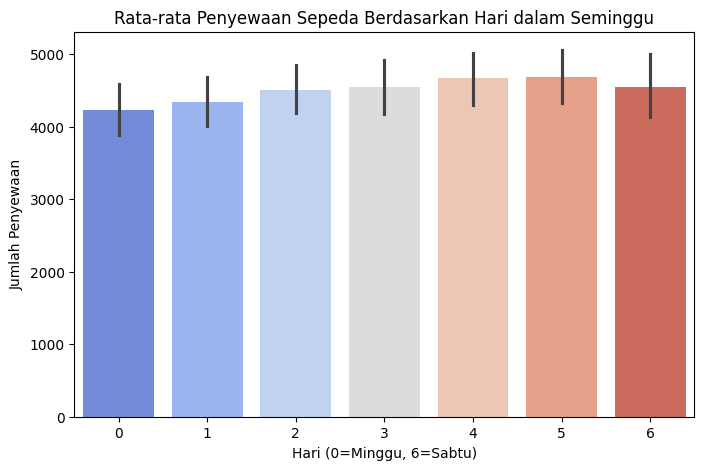

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari (0=Minggu, 6=Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

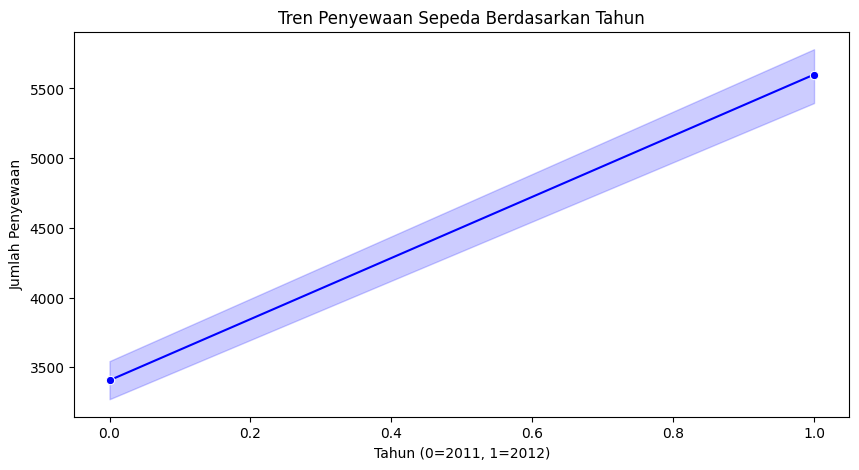

In [27]:
# Analisis tambahan: Tren Penyewaan Sepeda Berdasarkan Tahun
plt.figure(figsize=(10, 5))
sns.lineplot(x='yr', y='cnt', data=day_df, marker='o', color='b')
plt.title('Tren Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun (0=2011, 1=2012)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

## Conclusion

Kesimpulan Pertanyaan 1: Kondisi cuaca terbukti berpengaruh cukup besar terhadap frekuensi penyewaan sepeda. Jumlah penyewaan cenderung meningkat saat cuaca cerah atau hanya mendung ringan. Sebaliknya, saat hujan, angka penyewaan menurun secara drastis, baik pada hari kerja maupun akhir pekan.

Kesimpulan Pertanyaan 2: Aktivitas penyewaan sepeda di hari kerja menunjukkan pola yang konsisten, dengan lonjakan pada jam-jam sibuk pagi dan sore hari. Sementara itu, pada akhir pekan, distribusi penyewaan lebih merata sepanjang hari. Musim panas dan musim gugur menjadi periode dengan tingkat penyewaan tertinggi, sedangkan musim dingin menunjukkan angka terendah. Waktu ideal untuk menyewa sepeda di hari kerja adalah saat pagi dan sore, sementara akhir pekan memberikan fleksibilitas waktu yang lebih luas.